<a href="https://colab.research.google.com/github/juDEcorous/ML-Linear-Regression/blob/main/Core_Regression_Metrics_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regression Metrics Exercise (Core)**

Jude Maico Jr.

Assignment:
The ultimate goal of this task is to predict the price based on the available features using a linear regression model.

All of the features and the target are continuous variables.

For now, you do not need to do any cleaning of this data set. You can use it "as is."

An important exploration step is to determine if there are any moderate or strong correlations in your variables.

1. Make a heatmap of the correlations. Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price. Limit your analysis to these three features.

2. Select ONLY the 3 features most highly correlated with price for your feature matrix (X).  

3.  Select price for your target vector (y).

4. Split your data into train and test sets. Please use the random number 42 for consistency!

5. Instantiate your model and fit it on the training set.

6. Evaluate your model performance using R^2 on the training set and on the test set. Is there a difference between model performance on the training data vs the test data?

7. Evaluate your model on both data sets using mean absolute error (MAE).

8. Evaluate your model on both data sets using mean squared error (MSE).

9. Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector, in this case, 1,000s of dollars.

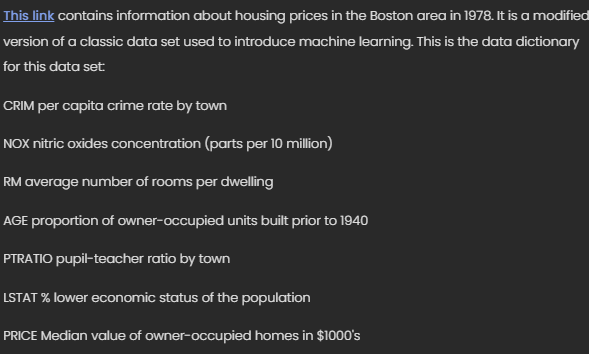

#Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
path = '/content/drive/MyDrive/Datas/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(path)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [ ]:
df.describe()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.554695,6.284634,68.574901,18.455534,12.653063,22.532806
std,8.601545,0.115878,0.702617,28.148861,2.164946,7.141062,9.197104
min,0.006320,0.385000,3.561000,2.900000,12.600000,1.730000,5.000000
25%,0.082045,0.449000,5.885500,45.025000,17.400000,6.950000,17.025000
50%,0.256510,0.538000,6.208500,77.500000,19.050000,11.360000,21.200000
75%,3.677083,0.624000,6.623500,94.075000,20.200000,16.955000,25.000000
max,88.976200,0.871000,8.780000,100.000000,22.000000,37.970000,50.000000


#Heatmap

<Axes: >

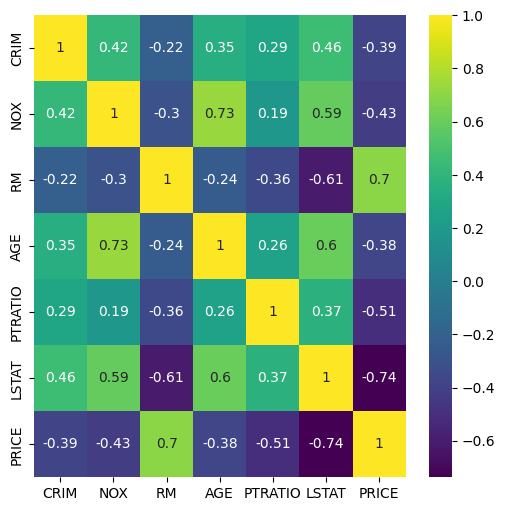

In [ ]:
fig, ax = plt.subplots(figsize = (6,6 ))
corr = df.corr()
sns.heatmap(corr, cmap = 'viridis', annot = True)

Correlated with price:
  - RM (0.7)
  - LSTAT (-0.74)
  - PTRATIO (-0.51)

# Separating Features and Train Split Test

In [ ]:
target = 'PRICE'
y = df[target]
X = df[['RM', 'LSTAT', 'PTRATIO']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#Instantiate and Fit Model

In [ ]:
linear_regression = LinearRegression()
scaler = StandardScaler()

linear_regression_pipeline = make_pipeline(scaler, linear_regression)

In [ ]:
linear_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
train_pred = linear_regression_pipeline.predict(X_train)
test_pred = linear_regression_pipeline.predict(X_test)

#R2

In [ ]:
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

In [ ]:
print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.6877966145058925
Model Testing R2: 0.6331590458194677


In [ ]:
train_r2 - test_r2

0.054637568686424776

Is there a difference between model performance on the training data vs the test data?

The training data and testing data has about 8% difference. This model kind of perform well with our data.

In [ ]:
mape_train = mean_absolute_percentage_error(y_train, train_pred)
mape_test = mean_absolute_percentage_error(y_test, test_pred)

#Mean Absolute Error (MAE)

In [ ]:
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

In [ ]:
print(f'Model Training MAE: {train_mae}')
print(f'Model Testing MAE: {test_mae}')

Model Training MAE: 3.714054057158005
Model Testing MAE: 3.391844829381397


In [ ]:
print(f'Model Training MAPE: {mape_train}')
print(f'Model Testing MAPE: {mape_test}')

Model Training MAPE: 0.1905362322271109
Model Testing MAPE: 0.1797926249833534


Since our price mean is 22. Our model shows being off with its prediction by about 18%. This means that on an average. I will mispredict the price by about 18%.

#Mean Squared Error (MSE)

In [ ]:
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

In [ ]:
print(f'Model Training MSE: {train_mse}')
print(f'Model Testing MSE: {test_mse}')

Model Training MSE: 27.68673681796949
Model Testing MSE: 25.68882419667596


Our model have about 60% increased which is too high compare to our price mean.

#Root Mean Squared Error (RMSE)

In [ ]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [ ]:
print(f'Model Training RMSE: {train_rmse}')
print(f'Model Testing RMSE: {test_rmse}')

Model Training RMSE: 5.261818774717492
Model Testing RMSE: 5.068414367104959


This doesn't shows being overfitting. Shows that RMSE performs well in this model. Our model shows being off by 27%, which is way higher than our MAE.